In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from nsepy import get_history
from datetime import date
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sbi = get_history(symbol = 'SBIN', start=date(2015,1,1), end=date(2022,3,1))
hdfc = get_history(symbol= 'HDFCBANK', start=date(2015,1,1), end=date(2022,3,1))
icici = get_history(symbol= 'ICICIBANK', start=date(2015,1,1), end=date(2022,3,1))
kotak = get_history(symbol= 'KOTAKBANK', start=date(2015,1,1), end=date(2022,3,1))

In [3]:
stocks = [sbi, hdfc, icici, kotak]
for i in stocks:
    i.drop(['Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Symbol', 'Series'], axis=1, inplace=True)

In [4]:
sbi.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2015-01-01,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488
2015-01-02,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094
2015-01-05,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716
2015-01-06,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257
2015-01-07,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745


In [5]:
hdfc.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2015-01-01,951.60,951.0,954.40,945.05,952.30,952.05,949.13,886235
2015-01-02,952.05,950.4,969.30,950.40,968.00,965.30,965.25,1475096
2015-01-05,965.30,970.0,970.55,955.10,958.50,957.15,959.15,1199000
2015-01-06,957.15,954.0,956.55,937.55,941.45,942.25,948.51,2054920
2015-01-07,942.25,939.7,951.35,936.25,944.80,945.00,946.73,1436528


In [6]:
icici.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2015-01-01,353.10,352.7,353.45,350.20,353.0,352.30,351.84,2348437
2015-01-02,352.30,352.0,363.50,352.00,363.0,362.30,360.06,7520900
2015-01-05,362.30,365.3,367.40,361.50,363.5,363.05,364.41,9378264
2015-01-06,363.05,359.4,359.90,346.20,346.4,347.65,351.80,12074934
2015-01-07,347.65,345.6,346.25,335.45,340.5,338.25,339.25,19322120


In [7]:
kotak.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2015-01-01,1263.90,1263.8,1265.00,1251.10,1261.75,1258.60,1259.52,250998
2015-01-02,1258.60,1261.0,1279.00,1258.30,1278.00,1271.55,1271.97,631815
2015-01-05,1271.55,1272.1,1278.85,1262.00,1267.60,1266.45,1266.77,305115
2015-01-06,1266.45,1255.0,1262.25,1233.55,1253.00,1251.35,1251.25,1134543
2015-01-07,1251.35,1247.5,1303.95,1247.50,1272.90,1271.50,1280.55,1785887


<AxesSubplot:xlabel='Date', ylabel='Close'>

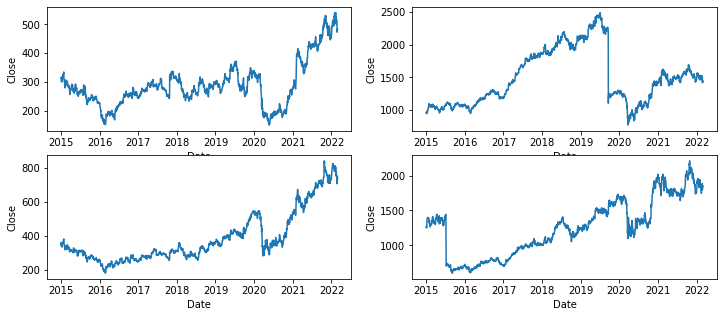

In [8]:
fig, ax = plt.subplots(2,2,figsize=(12,5))
sns.lineplot(x='Date', y='Close', data=sbi, ax=ax[0][0])
sns.lineplot(x='Date', y='Close', data=hdfc, ax=ax[0][1])
sns.lineplot(x='Date', y='Close', data=icici, ax=ax[1][0])
sns.lineplot(x='Date', y='Close', data=kotak, ax=ax[1][1])


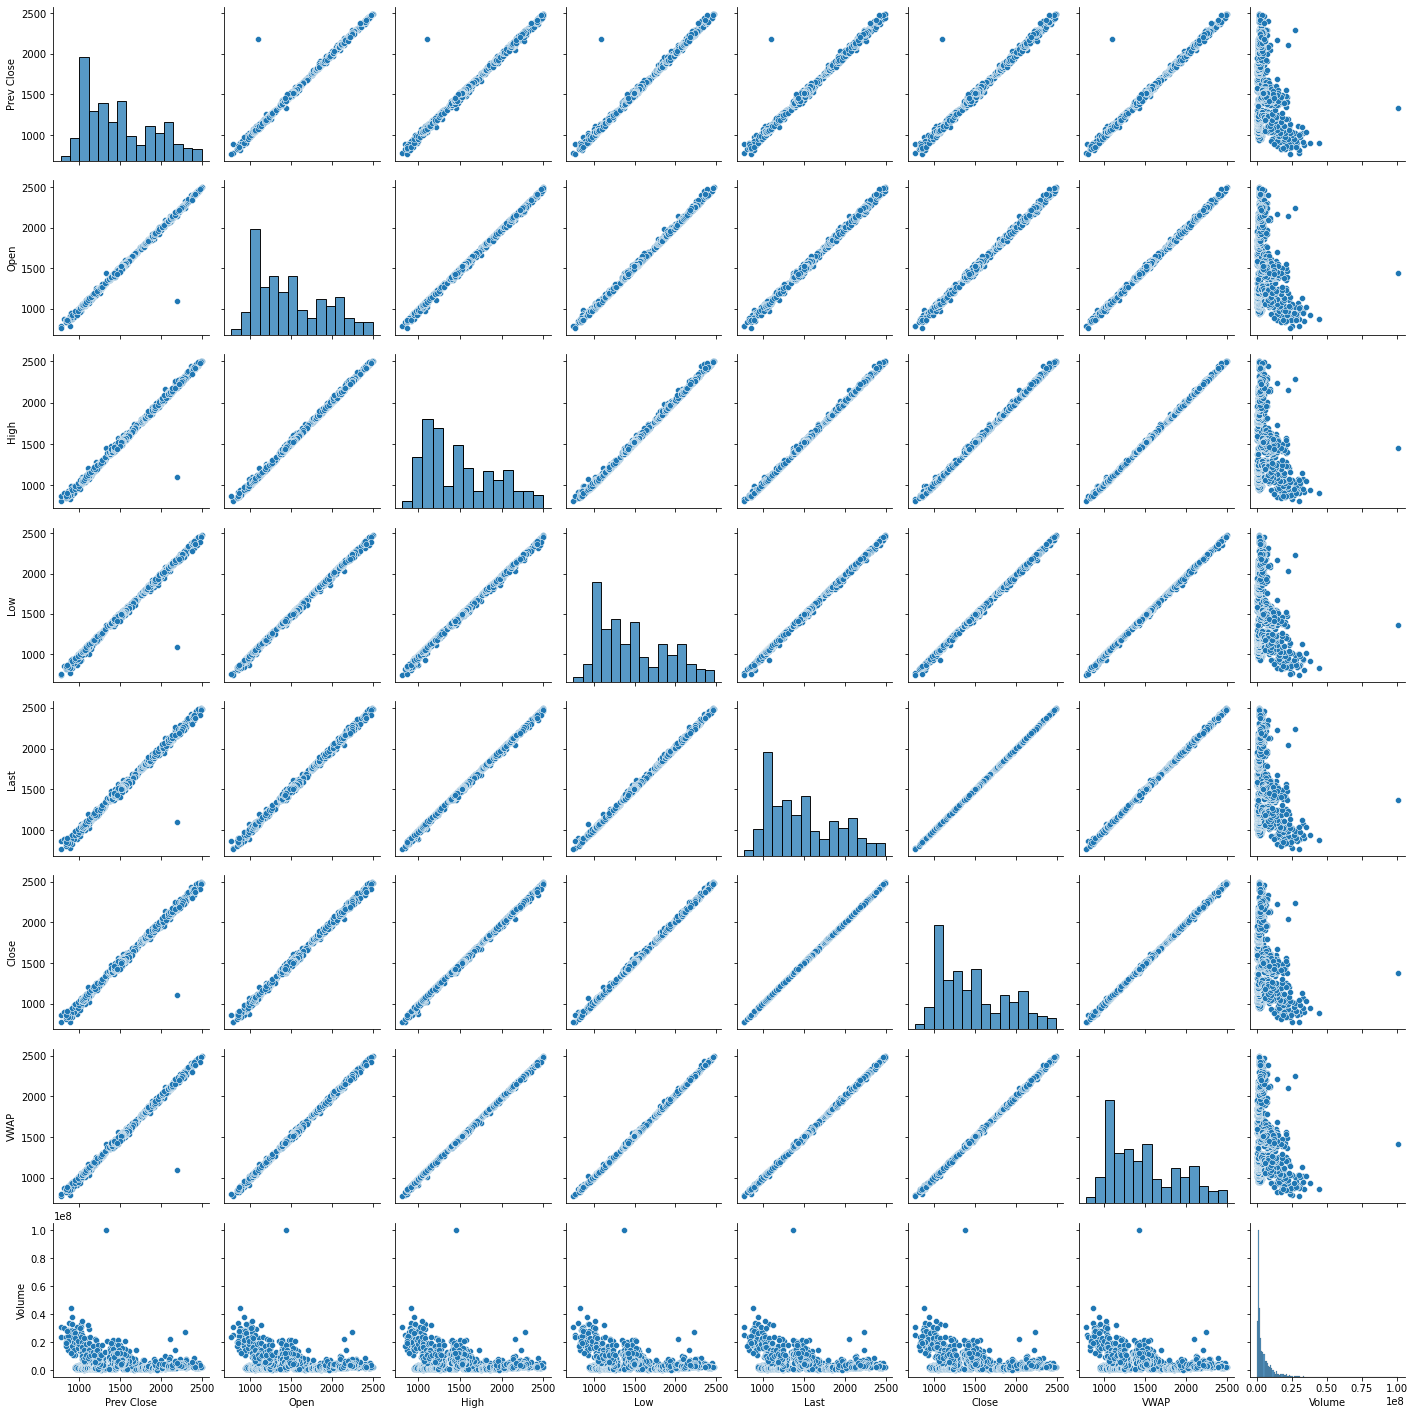

In [9]:
sns.pairplot(hdfc)

In [10]:
X = hdfc.drop('Close', axis=1)
y = hdfc['Close']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1419, 7), (1419,), (355, 7), (355,))

In [12]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
pred = reg.predict(X_test)

In [14]:
reg.score(X_train, y_train)

0.9999872186481367

In [15]:
reg.score(X_test, y_test)

0.9907655537410571

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
score

0.9907655537410571

In [17]:
from xgboost import XGBRegressor
xgb = XGBRegressor(tree_method = 'gpu_hist', n_estimators = 1200, learning_rate = 0.012, max_depth = 7)
xgb.fit(X_train, y_train)

C:\Users\chinn\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\chinn\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.012, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1200, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [18]:
xgb_pred = xgb.predict(X_test)

In [19]:
s = r2_score(y_test, xgb_pred)
s

0.9753215213432826

In [21]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
from sklearn.tree import export_graphviz

export_graphviz(reg,
feature_names= X.columns,
out_file=
class_names='Close',
rounded=True,
filled=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="VWAP <= 1590.175\\nsquared_error = 216597.967\\nsamples = 1419\\nvalue = 1496.118", fillcolor="#f4caac"] ;\n1 [label="Last <= 1156.325\\nsquared_error = 20554.9\\nsamples = 846\\nvalue = 1140.62", fillcolor="#f9e4d4"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Last <= 1006.425\\nsquared_error = 4284.879\\nsamples = 486\\nvalue = 1038.988", fillcolor="#fbebe0"] ;\n1 -> 2 ;\n3 [label="Last <= 917.525\\nsquared_error = 3067.757\\nsamples = 112\\nvalue = 945.201", fillcolor="#fcf2eb"] ;\n2 -> 3 ;\n4 [label="Last <= 850.3\\nsquared_error = 1464.567\\nsamples = 30\\nvalue = 867.237", fillcolor="#fef8f4"] ;\n3 -> 4 ;\n5 [label="Volume <= 24436416.0\\nsquared_error = 737.599\\nsamples = 8\\nvalue = 815.069", fillcolor="#fefcfa"] ;\n4 -> 5 ;\n6 [label="VWAP <= 828.625\\nsquared_error = 64.392\\nsamples = 6\\nvalue = 830.217"